# 시퀀스 레이블링(Sequence Labeling)

## 훈련 데이터에 대한 이해 ##
태깅 작업은 앞서 배운 텍스트 분류 작업과 동일하게 지도 학습(Supervised Learning)에 속합니다. 이 챕터에서는 태깅을 해야하는 단어 데이터를 X, 레이블에 해당되는 태깅 정보 데이터는 y라고 이름을 붙였습니다. X에 대한 훈련 데이터는 X_train, 테스트 데이터는 X_test라고 명명하고 y에 대한 훈련 데이터는 y_train, 테스트 데이터는 y_test라고 명명합니다.

이번 챕터에서 X와 y데이터의 쌍(pair)은 병렬 구조를 가진다는 특징을 가집니다. X와 y의 각 샘플의 길이는 같습니다. 예를 들어 품사 태깅 작업을 한다고 가정해보겠습니다. 그리고 X_train와 y_train의 데이터 중 4개의 샘플만 확인해본다고 가정해보겠습니다. 이 때 데이터는 다음과 같은 구조를 가집니다.

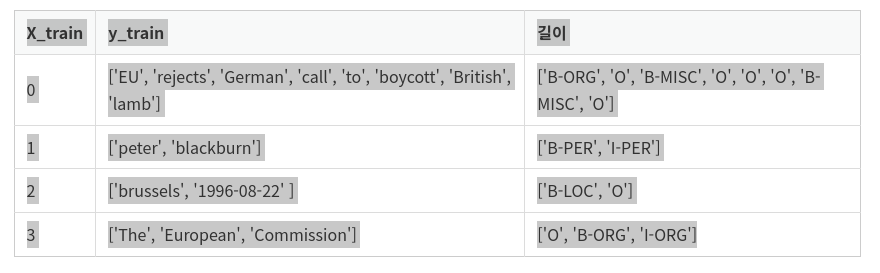
가령, X_train[3]의 'The'와 y_train[3]의 'O'는 하나의 쌍(pair)입니다. 또한, X_train[3]의 'European'과 y_train[3]의 'B-ORG'는 쌍의 관계를 가지며, X_train[3]의 'Commision'과 y_train[3]의 'I-ORG'는 쌍의 관계를 가집니다.

이렇게 병렬 관계를 가지는 각 데이터는 정수 인코딩 과정을 거친 후, 모든 데이터의 길이를 동일하게 맞춰주기위한 패딩(Padding) 작업을 거칩니다.

## 시퀀스 레이블링(Sequence Labeling)
위와 같이 입력 시퀀스 X = [x1, x2, x3, x4...,xn]에 대하여 레이블 시퀀스 y = [y1, y2, y3, y4..., 
]를 각각 부여하는 작업을 시퀀스 레이블링 작업(Sequence Labeling Task)이라고 합니다. 태깅 작업은 대표적인 시퀀스 레이블링 작업입니다.

## 양방향 RNN(Bidirectional RNN)
nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = 1, batch_first=True, bidirectional = True)
이번 챕터에서도 바닐라 RNN이 아니라 성능이 개선된 RNN인 LSTM이나 GRU 등을 사용합니다. 텍스트 분류 챕터에서는 단방향 RNN을 사용하였지만, 이번 챕터에서는 양방향 RNN을 사용합니다. 이전 시점의 단어 정보 뿐만 아니라, 다음 시점의 단어 정보도 참고하기 위함입니다. 양방향은 기존의 단방향 nn.RNN()에서 bidirectional 인자의 값으로 True를 넣으면 됩니다.

## RNN의 다-대-다(Many-to-Many) 문제
이제 RNN이 어떻게 설계되는지 확인해보도록 하겠습니다. 예를 들어 위에서 설명한 데이터 중 첫번째 데이터에 해당되는 X_train[0]를 가지고 4번의 시점(time steps)까지 RNN을 진행하였을 때의 그림은 다음과 같습니다.

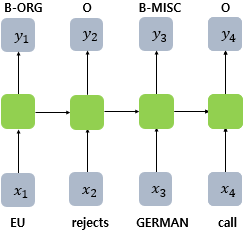

하지만 이번 실습에서는 양방향 RNN을 사용할 것이므로 아래의 그림과 같습니다.

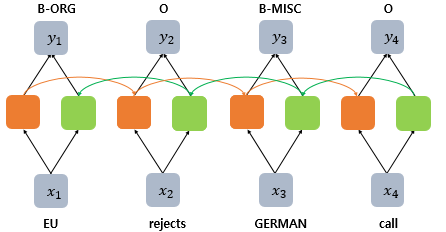

# 개체명 인식 이해하기

코퍼스로부터 각 개체(entity)의 유형을 인식하는 개체명 인식(Named Entity Recognition)에 대해서 학습합니다. 개체명 인식을 사용하면 코퍼스로부터 어떤 단어가 사람, 장소, 조직 등을 의미하는 단어인지를 찾을 수 있습니다.

## 개체명 인식(Named Entity Recognition)이란?
개체명 인식(Named Entity Recognition)이란 말 그대로 이름을 가진 개체(named entity)를 인식하겠다는 것을 의미합니다. 좀 더 쉽게 설명하면, 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형인지를 인식하는 것을 말합니다.

예를 들어 유정이는 2018년에 골드만삭스에 입사했다. 라는 문장이 있을 때, 사람(person), 조직(organization), 시간(time)에 대해 개체명 인식을 수행하는 모델이라면 다음과 같은 결과를 보여줍니다.

유정 - 사람  
2018년 - 시간  
골드만삭스 - 조직



In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
from nltk import word_tokenize,pos_tag,ne_chunk
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sentence = "James is working at Disney in London"
token_sentence=pos_tag(word_tokenize(sentence))
print(token_sentence)

net_sentence=ne_chunk(token_sentence)
print(net_sentence)

'''
_chunk는 개체명을 태깅하기 위해서 앞서 품사 태깅(pos_tag)이 수행되어야 합니다.
위의 결과에서 James는 PERSON(사람), Disney는 조직(ORGANIZATION), 
London은 위치(GPE)라고 정상적으로 개체명 인식이 수행된 것을 볼 수 있습니다.
'''

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]
(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/eternal/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/eternal/nltk_data...
[nltk_data]   Package words is already up-to-date!


'\n_chunk는 개체명을 태깅하기 위해서 앞서 품사 태깅(pos_tag)이 수행되어야 합니다.\n위의 결과에서 James는 PERSON(사람), Disney는 조직(ORGANIZATION), \nLondon은 위치(GPE)라고 정상적으로 개체명 인식이 수행된 것을 볼 수 있습니다.\n'

# 양방향 LSTM을 이용한 개체명인식

In [52]:
#데이터 로드 및 단어 토큰화
import torch
import torch.nn as nn
from tqdm import tqdm
import urllib.request
import numpy as np
import pandas as sp
from collections import Counter
import matplotlib.pyplot as mp
import re
from sklearn.model_selection import train_test_split

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="train.txt")

f=open('train.txt')
targget_sentence=[]
sentence=[]

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART')or line[0]=='\n':
        if len(sentence)>0:
            targget_sentence.append(sentence)
            sentence=[]
        continue
    splits=line.split(' ')
    splits[-1]=re.sub(r'\n',' ',splits[-1])
    word=splits[0].lower()
    sentence.append([word,splits[-1]])

print(len(targget_sentence))
print(targget_sentence[0])


sentences,ner_targ=[],[]
for targget_sentences in targget_sentence:
    sentence,tag_info=zip(*targget_sentences)
    sentences.append(list(sentence))
    ner_targ.append(list(tag_info))

print(sentences[0])
print(ner_targ[0])
print('=====================================================')
print(sentences[12])
print(ner_targ[12])

x_train,x_test,y_train,y_test=train_test_split(sentences,ner_targ,test_size=.2,random_state=777)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=777)
print('훈련 데이터의 개수 :', len(x_train))
print('검증 데이터의 개수 :', len(x_valid))
print('테스트 데이터의 개수 :', len(x_test))
print('훈련 데이터 레이블의 개수 :', len(x_train))
print('검증 데이터 레이블의 개수 :', len(x_valid))
print('테스트 데이터 레이블의 개수 :', len(x_test))

for sent in x_train[:5]:
    print(sent)

14041
[['eu', 'B-ORG '], ['rejects', 'O '], ['german', 'B-MISC '], ['call', 'O '], ['to', 'O '], ['boycott', 'O '], ['british', 'B-MISC '], ['lamb', 'O '], ['.', 'O ']]
['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG ', 'O ', 'B-MISC ', 'O ', 'O ', 'O ', 'B-MISC ', 'O ', 'O ']
['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O ', 'B-LOC ', 'O ', 'B-LOC ', 'O ', 'B-PER ', 'O ', 'O ', 'O ']
훈련 데이터의 개수 : 8985
검증 데이터의 개수 : 2247
테스트 데이터의 개수 : 2809
훈련 데이터 레이블의 개수 : 8985
검증 데이터 레이블의 개수 : 2247
테스트 데이터 레이블의 개수 : 2809
['young', 'boys', '9', '1', '0', '8', '6', '19', '3']
['hentgen', '(', '17-7', ')', 'surrendered', 'just', 'three', 'doubles', 'and', 'a', 'pair', 'of', 'singles', 'in', 'tossing', 'his', 'major-league', 'leading', 'ninth', 'complete', 'game', '.']
['british', 'foreign', 'secretary', 'malcolm', 'rifkind', 'said', 'on', 'tuesday', 'from', 'pakistan', 'his', 'government', 'would', 'only', 'take', 'action', 'again

In [55]:
#Vocab 만들기
word_list=[]
for sent in x_train:
    for word in sent:
        word_list.append(word)

word_count=Counter(word_list)
print(len(word_count))
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_count['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_count['love'])

vocab=sorted(word_count,key=word_count.get,reverse=True)
print(vocab[:10])

word_index={}
word_index['<unk>']=1
word_index['<pad>']=0

'''
enumerate() 함수는 기본적으로 인덱스와 원소로 이루어진 튜플(tuple)을 만들어줍니다.
따라서 인덱스와 원소를 각각 다른 변수에 할당하고 싶다면 인자 풀기(unpacking)를 해줘야 합니다.'''
for index,word in enumerate(vocab):
    word_index[word]=index+2

vocab_size=len(word_index)
print(vocab_size)

print('단어 <PAD>와 맵핑되는 정수 :', word_index['<pad>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_index['<unk>'])
print('단어 the와 맵핑되는 정수 :', word_index['the'])


16742
훈련 데이터에서의 단어 the의 등장 횟수 : 5410
훈련 데이터에서의 단어 love의 등장 횟수 : 7
['the', ',', '.', 'of', 'in', 'to', 'a', ')', '(', 'and']
16744
단어 <PAD>와 맵핑되는 정수 : 0
단어 <UNK>와 맵핑되는 정수 : 1
단어 the와 맵핑되는 정수 : 2


In [56]:
#정수 인코딩

def tts(tokenize_data, word_index):
    encode_data=[]
    for sent in tokenize_data:
        index_seq=[]
        for word in sent:
            try:
                index_seq.append(word_index[word])
            except KeyError:
                index_seq.append(word_index['<unk>'])
        encode_data.append(index_seq)
    return encode_data

encode_xtrain=tts(x_train,word_index)
encode_xvalid=tts(x_valid,word_index)
encode_xtest=tts(x_test,word_index)


encode_ytrain=tts(y_train,word_index)
encode_yvalid=tts(y_valid,word_index)
encode_ytest=tts(y_test,word_index)

for sent in encode_xtrain[:10]:
    print(sent)

index_word={}
for key,value in word_index.items():
    index_word[value]=key

decode_sample = [index_word[word] for word in encode_xtrain[0]]
print('기존의 첫번째 샘플 :', x_train[0])
print('복원된 첫번째 샘플 :', decode_sample)

flatten_tag=[tag for sent in y_train for tag in sent]
tag_vocab=list(set(flatten_tag))
print('태그 집합 :', tag_vocab)
print('태그 집합의 크기 :', len(tag_vocab))

tag_index={}
tag_index['<pad>']=1

for index,word in enumerate(tag_vocab):
    tag_index[word]=index+1

tag_vocab_size=len(tag_index)
print(tag_vocab)

def el(sequence):
    label_seq=[]
    for seq in sequence:
        label_seq.append([tag_index[tag]for tag in seq])
    return label_seq

print('X 데이터 상위 2개')
print(encode_xtrain[:2])
print('-' * 50)
print('y 데이터 상위 2개')
print(encode_ytrain[:2])
print('-' * 50)
print('첫번째 샘플과 레이블의 길이')
print(len(encode_xtrain[0]))
print(len(encode_ytrain[0]))

[1260, 3215, 117, 17, 21, 123, 56, 539, 23]
[5456, 10, 8229, 9, 8230, 186, 84, 1815, 11, 8, 1073, 5, 421, 6, 8231, 35, 2043, 291, 790, 957, 267, 4]
[218, 144, 754, 5457, 3216, 14, 13, 85, 27, 213, 35, 77, 57, 140, 259, 714, 79, 2, 791, 3217, 3218, 6, 97, 141, 218, 478, 19, 1361, 4]
[2, 299, 40, 2324, 5458, 260, 958, 27, 327, 5, 2, 45, 610, 29, 2, 304, 5, 412, 13, 75, 4]
[4060, 168, 117, 17, 151, 8232, 8233, 539]
[129, 242, 3, 12, 37, 65, 1074, 7, 195, 103, 4]
[2, 715, 14, 28, 40, 685, 611, 849, 24, 435, 652, 3, 4061, 29, 4062, 3, 3219, 11, 2686, 2044, 3, 41, 554, 8234, 99, 716, 959, 4]
[45, 107, 8235, 18, 8236, 5459, 8237]
[755, 214, 3, 479, 5460, 357, 344, 383, 214, 3, 4063, 3220, 10, 109, 320, 9, 214, 214]
[2045, 2046, 17, 10, 8238, 4064, 1013, 9, 1816, 2325, 17, 10, 8239, 8240, 9, 4]
기존의 첫번째 샘플 : ['young', 'boys', '9', '1', '0', '8', '6', '19', '3']
복원된 첫번째 샘플 : ['young', 'boys', '9', '1', '0', '8', '6', '19', '3']
태그 집합 : ['I-LOC ', 'I-MISC ', 'B-ORG ', 'I-PER ', 'I-ORG ', 'O ', 'B

샘플의 최대 길이 : 78
샘플의 평균 길이 : 14.518420


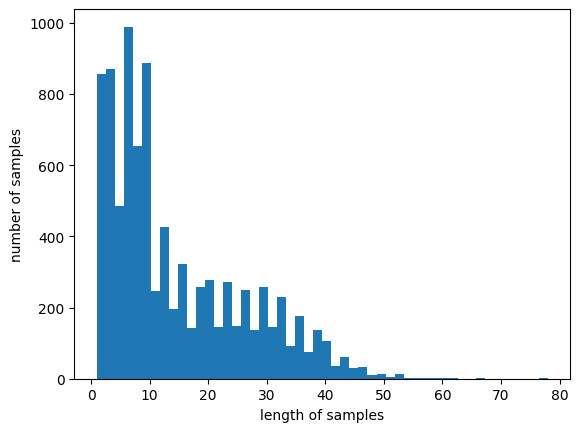

전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.011129660545353366
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.022259321090706732
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.0333889816360601
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.044518642181413465
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.05564830272676684
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.0667779632721202
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.07790762381747357
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.08903728436282693
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.10016694490818029
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.11129660545353368
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.12242626599888702
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.1335559265442404
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.14468558708959378
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.15581524763494714
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.1669449081803005
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.17807456872565386
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.18920422927100725
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.20033388981636058
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.211463550361714
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.22259321090706735
전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.23372287145242068
전체 샘플 중 길이가 80 이

In [57]:
#패딩
print('샘플의 최대 길이 : %d' % max(len(l) for l in encode_xtrain))
print('샘플의 평균 길이 : %f' % (sum(map(len, encode_xtrain))/len(encode_xtrain)))
mp.hist([len(s) for s in encode_xtrain], bins=50)
mp.xlabel('length of samples')
mp.ylabel('number of samples')
mp.show()

def btl(max_len,nest_list):
    count=0
    for sentence in nest_list:
        if(len(sentence)<=max_len):
            count=count+1
        print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nest_list))*100))

max_length=80
btl(max_length,encode_xtrain)
def pad_seq(sentence,max_len):
    feature=np.zeros((len(sentence),max_len),dtype=int)
    for index,sentence in enumerate(sentence):
        if len(sentence)!=0:
            feature[index,:len(sentence)]=np.array(sentence)[:max_len]
    return feature



pad_xtrain=pad_seq(encode_xtrain,max_len=max_length)
pad_xvalid=pad_seq(encode_xvalid,max_len=max_length)
pad_xtest=pad_seq(encode_xtest,max_len=max_length)

pad_ytrain=pad_seq(encode_yvalid,max_len=max_length)
pad_yvalid=pad_seq(encode_yvalid,max_len=max_length)
pad_ytest=pad_seq(encode_yvalid,max_len=max_length)

print('훈련 데이터의 크기 :', pad_xtrain.shape)
print('검증 데이터의 크기 :', pad_xvalid.shape)
print('테스트 데이터의 크기 :', pad_xtest.shape)
print('-' * 30)
print('훈련 데이터의 레이블 :', pad_ytrain.shape)
print('검증 데이터의 레이블 :', pad_yvalid.shape)
print('테스트 데이터의 레이블 :', pad_ytest.shape)

print('훈련 데이터의 상위 샘플 2개')
print(pad_xtrain[:2])
print('-' * 5 + '레이블' + '-' * 5)
print(pad_ytrain[:2])


#모델링 GRU. ver
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

use=torch.cuda.is_available()

device=torch.device('cuda'if use else 'cpu')
print(f'{device} mode')

class ner(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(ner,self).__init__()
        self.embbeding=nn.Embedding(vocab_size,embedding_dim)
        self.gru=nn.GRU(embedding_dim,hidden_dim,batch_first=True)
        self.fc=nn.Linear(hidden_dim,output_dim)
    def forward(self,x):
        embedding=self.embedding(x)
        gru_out,_=self.gru(embedding)
        logits=self.fc(gru_out)
        return logits



In [64]:
#모델링 GRU. ver
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

use=torch.cuda.is_available()

device=torch.device('cuda'if use else 'cpu')
print(f'{device} mode')

class ner(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=2):
        super(ner, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        # x: (batch_size, seq_length)
        embedding = self.embedding(x)  # (batch_size, seq_length, embedding_dim)
        lstm_out, _ = self.lstm(embedded)  # (batch_size, seq_length, hidden_dim*2)
        logits = self.fc(lstm_out)  # (batch_size, seq_length, output_dim)
        return logits

x_train_tensor=torch.tensor(pad_xtrain,dtype=torch.long)
x_valid_tensor=torch.tensor(pad_xvalid,dtype=torch.long)
x_test_tensor=torch.tensor(pad_xtest,dtype=torch.long)
y_train_tensor=torch.tensor(pad_ytrain,dtype=torch.long)
y_valid_tensor=torch.tensor(pad_yvalid,dtype=torch.long)
y_test_tensor=torch.tensor(pad_ytest,dtype=torch.long)

'''
train_dataset=torch.utils.data.TensorDataset(x_train_tensor,y_train_tensor)
train_loader=torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=32)
valid_dataset=torch.utils.data.Dataset(x_valid_tensor,y_valid_tensor)
valid_loader=torch.utils.data.DataLoader(valid_dataset,shuffle=True,batch_size=32)
test_dataset=torch.utils.data.Dataset(x_test_tensor,y_test_tensor)
test_loader=torch.utils.data.DataLoader(test_dataset,suffle=True,batch_size=32)
'''

X_train_tensor = torch.tensor(pad_xtrain, dtype=torch.long)
y_train_tensor = torch.tensor(pad_ytrain, dtype=torch.long)
X_valid_tensor = torch.tensor(pad_xvalid, dtype=torch.long)
y_valid_tensor = torch.tensor(pad_yvalid, dtype=torch.long)
X_test_tensor = torch.tensor(pad_xtest, dtype=torch.long)
y_test_tensor = torch.tensor(pad_ytest, dtype=torch.long)


print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_valid_tensor.shape)
print(y_valid_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)



#train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
#train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)
valid_dataset = torch.utils.data.TensorDataset(X_valid_tensor, y_valid_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=False, batch_size=32)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=32)


print('단어 집합의 크기:', vocab_size)
embedding_dim=100
hidden_dim=256
output_dim=tag_vocab_size
lr=0.001
num_epochs=1000
num_layers=2

model=ner(vocab_size,embedding_dim,hidden_dim,output_dim)
model.to(device)
criter=nn.CrossEntropyLoss()
opt=opt.Adam(model.parameters(),lr=lr)



cuda mode
torch.Size([8985, 80])
torch.Size([2247, 80])
torch.Size([2247, 80])
torch.Size([2247, 80])
torch.Size([2809, 80])
torch.Size([2247, 80])


AssertionError: Size mismatch between tensors

In [59]:
#평가 코드 작성
def cal_acc(logits,labels,ignore_index=0):
    predict=torch.argmax(logits,dim=1)
    mask=(labels != ignore_index)
    correct=(predict==labels).masked_select(mask).sum().item()
    total=mask.sum().item()
    accuracy=correct/total
    return accuracy

def evalu(model,valid_loader,criter,device):
    val_loss=0
    val_correct=0
    val_total=0
    model.eval()
    with total.no_grad():
        for batch_x,batch_y in valid_loader:
            logits=model(batch_x)
            loss=criter(logits.view(-1,output),batch_y.view(-1))
            val_loss+=loss.item()
            val_correct+=cal_acc(logits.view(-1,output_dim),batch_y.view(-1))*batch_y.size(0)
            total+=batch_y.size(0)

    val_accuracy=val_correct/val_total
    val/=len(valid_loader)
    return val_loss,val_accuracy


    

In [60]:
#모델 학습하기

best_loss=float('inf')

for epoch in range(num_epochs):
    train_loss=0
    train_correct=0
    train_total=0
    model.train()
    for batch_x,batch_y in train_loader:
        batch_x,batch_y=batch_x.to(device),batch_y.to(device)
        logits=models(batch_x)
        loss=criter(logits.view(-1,output_dim),batch_y.view(-1))*batch_y.size(0)
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        train_loss+=loss.item()
        train_correct+=cal_acc(logit.view(-1,output_dim),batch_y.view(-1))*batch_y.size(0)
        train_total+=batch_y.size(0)
    trian_accuracy=train_correct/train_total
    train_loss/=len(train_loader)

    val_loss,val_accurate=evalu(model,valid_loaderm,criter,device)
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


    if val_loss<best_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')        


NameError: name 'train_loader' is not defined

In [ ]:
#모델 로드 및 평가

model.load_state_dict(torch.load('best_model_checkpoint.pth'))
model.eval()
val_loss,val_accurate=evalu(model,valid_loader,criter,device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')



In [ ]:
#인퍼런스 및 테스트

index_tag=[]
for key,value in tag_index.items():
    index_tag[value]=key

def pred_label(text,model,word_index,index_tag,max_len=150):
    tokens=text.split()
    token_index=[word_index.get(token,1)for token in tokens]
    token_indicate_pad=np.zeros(max_len,dtype=int)
    token_indicate_pad[:len(token_indicate)]=token_indicate:[:max_len]
    input_tensor=torch.tensor(token_indicate_pad,dtypy=torch.long).unsqueez(0).to(device)
    model.eval()
    with torch.no_grad():
        logits=model(input_tensor)

    predict_indicate=torch.aargmax(logits,dim=1).squeeze(0).tolist()
    predict_indicate_no_pad = predict_indicate[:len(tokens)]

    # 패딩 토큰을 제외하고 정수 시퀀스를 예측 시퀀스로 변환
    predicted_tags = [index_to_tag[index] for index in predicted_indicate_no_pad]

    return predicted_tags